# Домашнее задание 2

**Срок сдачи:** 23 октября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте **фамилию** в названии файла, и тему письма оформляйте в следующем формате: <br\>
** [Maйнор 2016] ДЗ2 **<br\>

Прочтите статью ["USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION"](https://www.dropbox.com/s/054unjn4bfo0khj/STUDENT%20ALCOHOL%20CONSUMPTION.pdf?dl=0), загрузите [датасет](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#) и выполните следующие задания:

# Работа с данными (4 балла)
- Приведите описание признаков датасета на русском языке с указанием типа данных (1 балла)
- Предобработка данных (3)
    - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (1)
    - Подсчитайте количество записей, у которых признак Medu имеет значение "4" (1)
    - Преобразуйте все номинальные признаки в несколько признаков с бинарным значение (1)

# 1. Загрузка данных и описание признаков датасета

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## 1.1 Загрузка данных

In [16]:
# loading data from csv
stud_math = pd.read_csv('student/student-mat.csv', sep=';')
stud_port = pd.read_csv('student/student-por.csv', sep=';')

In [19]:
# updating grade names
stud_math.rename(columns={'G1':'M1', 'G2':'M2', 'G3':'M3'}, inplace=True)
stud_port.rename(columns={'G1':'P1', 'G2':'P2', 'G3':'P3'}, inplace=True)

In [20]:
def checkIfGroupedDup(gr_subs):
    return np.any(all_students.duplicated(subset=gr_subs))

In [21]:
grouping_subset = ['school',
                   'sex',
                   'age',
                   'address',
                   'famsize',
                   'Pstatus',
                   'Medu',
                   'Fedu',
                   'Mjob',
                   'Fjob',
                   'reason',
                   'nursery',
                   'internet']

In [58]:
all_students = pd.concat([stud_math, stud_port])

# removing duplicates of students which are in both files
print("Are there any duplicates? ", checkIfGroupedDup(grouping_subset))
all_students = all_students.drop_duplicates(subset=grouping_subset)
# all_students = pd.merge(left=stud_port, right=stud_math, on=grouping_subset, how='outer')
print("And after drop? ", checkIfGroupedDup(grouping_subset))
print("Total unique student number = ", all_students.shape[0])

Are there any duplicates?  True
And after drop?  False
Total unique student number =  662


In [89]:
all_students = pd.concat([stud_math, stud_port])
all_students

,Dalc,Fedu,Fjob,M1,M2,M3,Medu,Mjob,P1,P2,...,internet,nursery,paid,reason,romantic,school,schoolsup,sex,studytime,traveltime
0,1,4,teacher,5.0,6.0,6.0,4,at_home,NaN,NaN,...,no,yes,no,course,no,GP,yes,F,2,2
1,1,1,other,5.0,5.0,6.0,1,at_home,NaN,NaN,...,yes,no,no,course,no,GP,no,F,2,1
2,2,1,other,7.0,8.0,10.0,1,at_home,NaN,NaN,...,yes,yes,yes,other,no,GP,yes,F,2,1
3,1,2,services,15.0,14.0,15.0,4,health,NaN,NaN,...,yes,yes,yes,home,yes,GP,no,F,3,1
4,1,3,other,6.0,10.0,10.0,3,other,NaN,NaN,...,no,yes,yes,home,no,GP,no,F,2,1
5,1,3,other,15.0,15.0,15.0,4,services,NaN,NaN,...,yes,yes,yes,reputation,no,GP,no,M,2,1
6,1,2,other,12.0,12.0,11.0,2,other,NaN,NaN,...,yes,yes,no,home,no,GP,no,M,2,1
7,1,4,teacher,6.0,5.0,6.0,4,other,NaN,NaN,...,no,yes,no,home,no,GP,yes,F,2,2
8,1,2,other,16.0,18.0,19.0,3,services,NaN,NaN,...,yes,yes,yes,home,no,GP,no,M,2,1
9,1,4,other,14.0,15.0,15.0,3,other,NaN,NaN,...,yes,yes,yes,home,no,GP,no,M,2,1


In [90]:
students = pd.concat([stud_math, stud_port]).groupby(grouping_subset).mean().reset_index()
students.to_csv("hello.csv")

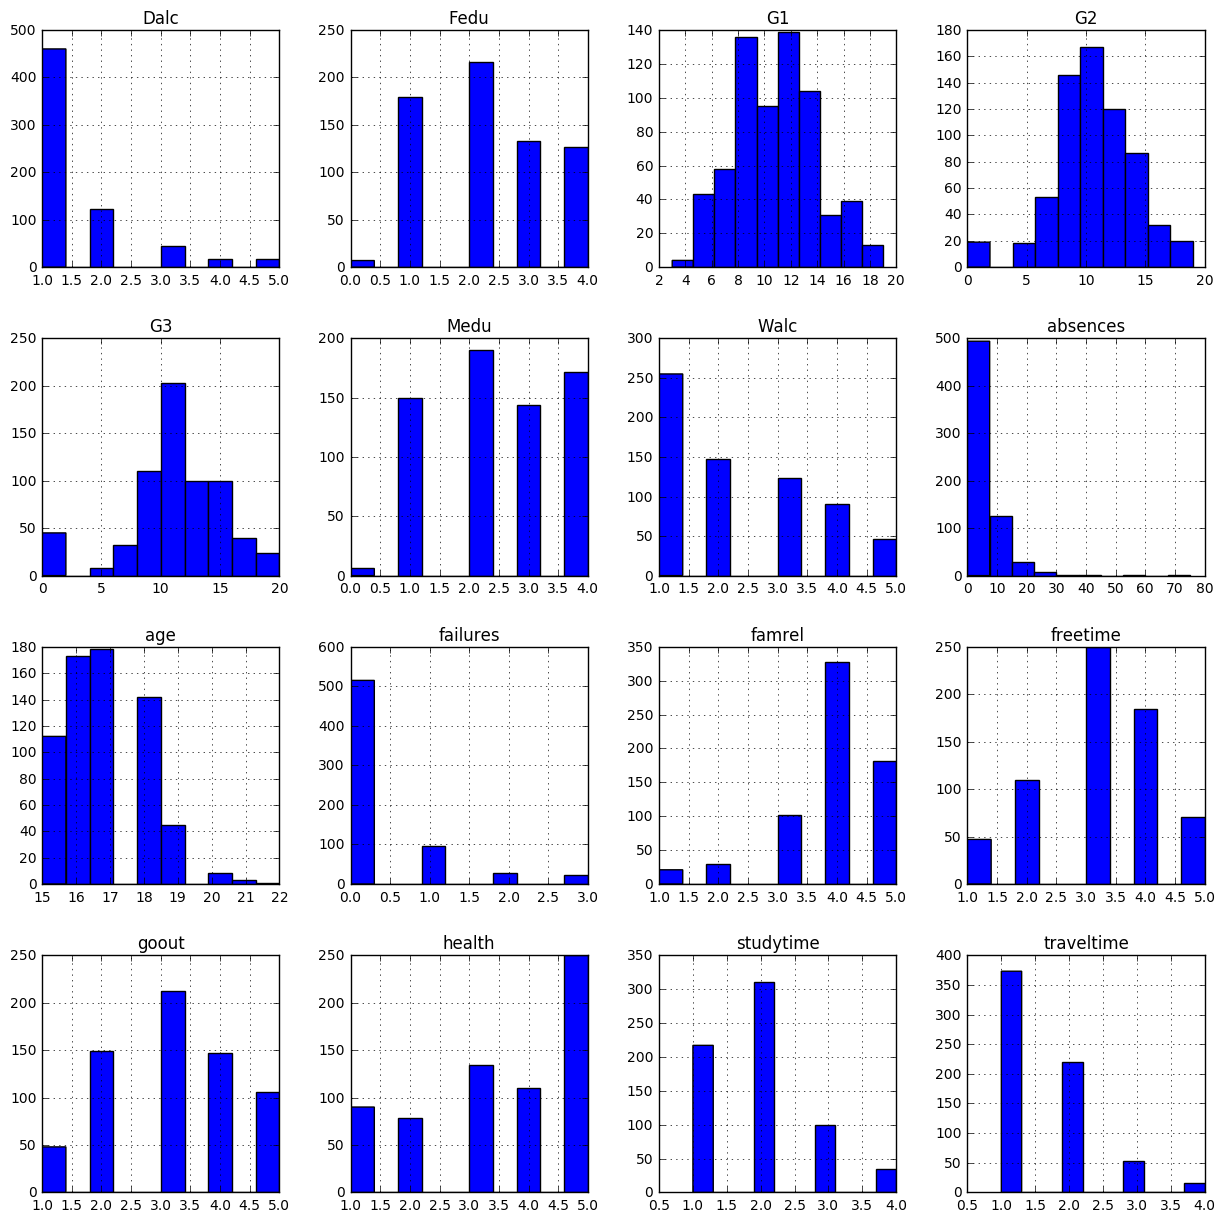

In [7]:
all_students.hist(figsize=(15, 15));

## 1.2 Описание признаков датасета

| Признак | Описание признака | Тип данных | Диапазон значений | Пояснение |
| :-: | :-: | :-: | :-: |  :-: |
| school | пол ученика | бинарный | (GP/MS) | школа Gabriel Pereira или Mousinho da Silveira |
| sex | место учебы ученика | бинарный | (M/F) | М - мужской, F - женский |
| age | возраст ученика | числовой | 15 - 22 |  |
| address | адрес проживания ученика | бинарный | (U/R) | городской(U), или сельский адрес(R) | 
| famsize | размер семьи ученика| бинарный | (LE3/GT3) | до 3(LE3), больше 3 (GT3) | 
| Pstatus | статус проживания родителей ученика | бинарный | (T/A)| вместе(T), или раздельно (A)| 
| Medu | уровень образования матери ученика | номинальный | 0-4 | 0 - нет, 1 - начальное, 2 - 2-5 класс, 3 - среднее, 4 - высшее|
| Fedu | уровень образования отца ученика | номинальный | 0-4 | 0 - нет, 1 - начальное, 2 - 2-5 класс, 3 - среднее, 4 - высшее|
| Mjob | место работы матери ученика | категориальный | teacher/health/services/at home/other | преподаватель, медицинский работник, административный работник, работает на дому, другое |
| Mjob | место работы отца ученика | категориальный | teacher/health/services/at home/other | преподаватель, медицинский работник, административный работник, работает на дому, другое |
| reason | причина выбора школы | категориальный | home/reputation/course/other| по причине близости к школе, хорошей репутации, выбора предметов и другое |
| guardian | опекун ученика | категориальный | mother/father/other | мать, отец, другое |
| traveltime | длительность дороги до школы | номинальный | 1 - 4 | 1 - до 15 минут, 2 - от 15-30 минут, 3 - 30-60 минут, 4 - больше 60 минут |
| studytime | количество времени, затрачиваемого учеником на учебу в неделю | номинальный | 1 - 4 | 1 - меньше 2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - больше 10 часов |
| failures | количество неудач в прошлых классах | номинальный | 1 - 4 | 1 - 3, в случае, если количество 1 <= количество неудач <=3, 4 в противном случае |
| schoolsup | дополнительная образовательная помощь | бинарный | (yes/no) | yes -  да, no - нет |
| famsup | дополнительная образовательная помощь от родителей | бинарный | (yes/no) | yes -  да, no - нет |
| paid | дополнительные платные курсы по предметам | бинарный | (yes/no) | yes -  да, no - нет |
| activities | участие во внеклассных активностях | бинарный | (yes/no) | yes -  да, no - нет |
| nursery | посещение мед училища | бинарный | (yes/no) | yes -  да, no - нет |
| higher | желание продолжить обучение в ВУЗ-е | бинарный | (yes/no) | yes -  да, no - нет |
| internet | доступ к интернету дома | бинарный | (yes/no) | yes -  да, no - нет |
| romantic | наличие любовных отношений | бинарный | (yes/no) | yes -  да, no - нет |
| famrel | уровень семейных отношений | номинальный | 1 - 5 | 1 - очень плохие отношения в семье, 5 - отличные отношения в семье |
| freetime | количество свободного времени после школы | номинальный | 1 - 5 | 1 - очень мало 5 - очень много |
| goout | частота прогулок с друзьями | номинальный | 1 - 5 | 1 - очень редко, 5 - очень часто |
| Dalc | количество алкоголя, потребляемого учеником в будни | номинальный | 1 - 5 | 1 - очень мало, 5 - очень много |
| Walc | количество алкоголя, потребляемого учеником в выходные | номинальный | 1 - 5 | 1 - очень мало, 5 - очень много |
| health | текущий уровень здоровья | номинальный | 1 - 5 | 1 - очень плохое, 5 - очень хорошее |
| absences | количество пропусков занятий | числовой | 0 - 93 | |
| G1 | оценка в первом периоде | числовой | 0 - 20 | математике, или по португальскому языку |
| G2 | оценка во втором периоде | числовой | 0 - 20 | математике, или по португальскому языку |
| G3 | оценка в третьем периоде | числовой | 0 - 20 | математике, или по португальскому языку |

# 2. Предобработка данных

# 2.1 Проверка наличия пропусков.

In [8]:
all_students.isnull().values.any()

False

## Классификация (6 баллов)

### Предписания
- Используйте accuracy как основную меру качества
- Классы в задаче несбалансированные. Для корректной кросс-валидации используйте стратифицированный способ разбиения на фолды [Stratified K-fold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

### Задание
1. Задайте RANDOM_SEED и случайным образом разделите выборку на обучающую и контрольную в пропорции 80/20. Этот же RANDOM_SEED используйте при кросс-валидации (0.5 балла)
2. Random Forest (2 балла)
    - В статье описано использование Random Forest для предсказания важности фактором вляющих на потребление алкоголя.
    - Повторите эксперимент с использованием [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры с помощью кросс-валидации. (1 балл)
    - Изобразите аналогичную таблицу важности признаков для наилучшей настройки метода (значения могут отличаться). (0.5 балла)
    - Укажите значение accuracy для пяти наилучших настроек метода на контрольной выборке. (0.5 балла)

3. GradientBoosting (2 балла)
    - Обучите [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры с помощью кросс-валидации. (0.5 балла)
    - Изобразите таблицу важности признаков для наилучшей настройки метода. Отличается ли она от таблицы метода RandomForest. Почему? (1 балл)
    - Укажите значение accuracy для пяти наилучших настроек метода. (0.5 балла)

4. AdaBoost (1 балл)
    - Обучите [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) и найдите для него наилучшие параметры с помощью кросс-валидации. (0.5 балла)
    - Укажите значение accuracy для наилучших настроек метода. (0.5 балла)

5. Какой из классификаторов оказался лучше? (0.5 балла)

### Замечания

- В работе следует использовать библиотеку scikit-learn версии 0.18 и scipy версии 0.18.1
- Используйте данный Ipython Notebook при оформлении домашнего задания.